In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
from matplotlib.colors import ListedColormap
# cmap_1 = ['#1b9e77', '#d95f02', '#7570b3']
cmap_2 = ['#7fc97f', '#beaed4', '#fdc086']
color_map = ListedColormap(cmap_2)


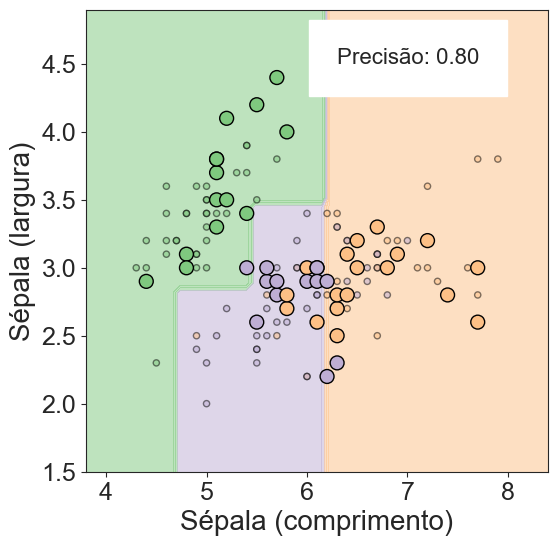

In [182]:
iris = load_iris()

feature_name = ["Sépala (comprimento)", "Sépala (largura)", "Pétala (comprimento)", "Pétala (largura)"]
# classes = ["Setosa", "Versicolor", "Virginica"]
features_to_train = [0,1]

X = iris.data

feature_1, feature_2 = np.meshgrid(
    np.linspace(X_train[:,features_to_train[0]].min() - 0.5, X_train[:,features_to_train[0]].max() + 0.5),
    np.linspace(X_train[:,features_to_train[1]].min() - 0.5, X_train[:,features_to_train[1]].max() + 1.0)
)
max_depth=3
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
model = DecisionTreeClassifier(max_depth=max_depth)
tree = model.fit(X_train[:, features_to_train], y_train)

y_pred = np.reshape(tree.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)

display.plot(cmap=color_map, alpha=0.5)

display.ax_.scatter(
    X_train[:, features_to_train[0]], X_train[:,features_to_train[1]], c=y_train, alpha=0.5, cmap=color_map, edgecolor="black", s=20 #, label=iris.target_names
)

display.ax_.scatter(
    X_test[:, features_to_train[0]], X_test[:,features_to_train[1]], c=y_test, cmap=color_map, edgecolor="black", s=100 #, label=iris.target_names
)


score = model.score(X_test[:, features_to_train], y_test)

display.ax_.set_box_aspect(aspect=1)
display.ax_.set_xlabel(feature_name[features_to_train[0]], fontsize=20)
display.ax_.set_ylabel(feature_name[features_to_train[1]], fontsize=20)
display.ax_.tick_params(axis='both', which='major', labelsize=18)
# plt.legend()
fig = plt.gcf()
fig.set_size_inches(6, 6)
# plt.text(4, 0, f"Precisão: {score:.3f}", fontsize=16, bbox={'facecolor': "white", 'pad': 20})
plt.text(6.3, 4.5, f"Precisão: {score:.2f}", fontsize=16, bbox={'facecolor': "white", 'pad': 20})
plt.savefig(f'dt_iris_setal_maxdepth_train-test.png', dpi=400, format='png', bbox_inches='tight', transparent=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [109]:
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.30)

In [140]:
accs_train = []
accs_test = []

depths = range(1,16)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    accs_train.append(acc_train)
    accs_test.append(acc_test)

    

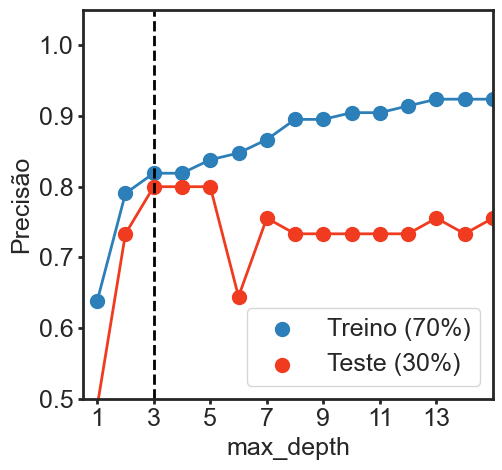

In [142]:
# import seaborn as sns
sns.set_style("ticks")

plt.plot(depths, accs_train, color='#2c7fb8',linestyle='-', linewidth=2)
plt.plot(depths, accs_test, color='#f03b20',linestyle='-', linewidth=2)
plt.scatter(depths, accs_train, color='#2c7fb8', label="Treino (70%)", s=100)
plt.scatter(depths, accs_test, color='#f03b20', label="Teste (30%)", s=100)
plt.plot(3*np.ones(100),np.linspace(0.5,1.05, 100), color="black", linestyle="--", linewidth=2)
plt.ylim(0.5,1.05)
plt.xlim(0.5,15)
plt.xlabel("max_depth", fontsize=18)  
plt.ylabel('Precisão', fontsize=18)
plt.xticks([1,3,5,7,9,11,13])
plt.tick_params(axis='both', which='major', labelsize=18, width=2)
plt.legend(loc="lower right", fontsize=18)
plt.gca().set_aspect(25)

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.tight_layout()
# plt.savefig(f'dt_iris_setal_maxdepth_{max_depth:02}.png', dpi=400, format='png', bbox_inches='tight', transparent=True)
# plt.title("Modelo para Sépala (comprimento) e Sépala (largura)", fontsize=18)
plt.savefig("train_test_sepal.png", dpi=400, format='png', bbox_inches='tight')
plt.show()

# Matriz de confusão

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay

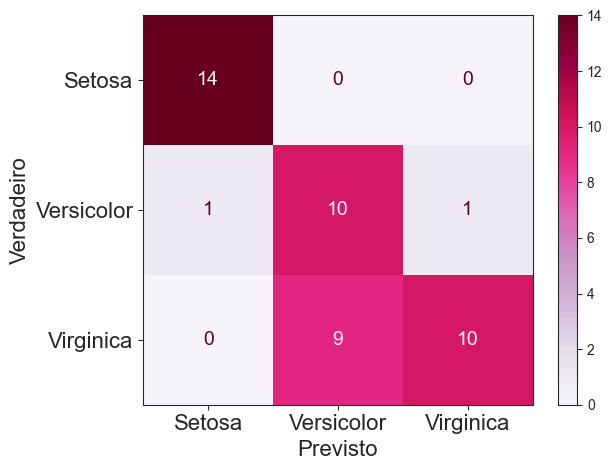

In [168]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.PuRd, display_labels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel('Previsto', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=16)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(rotation=0, fontsize=16)
ax = plt.gca()  # Obtém o Axes atual para fazer ajustes adicionais
for text in ax.texts:
    text.set_fontsize(14)  # Ajusta o tamanho da fonte dos valores dentro da matriz

plt.tight_layout()
plt.savefig("confusion_matrix_iris.png", dpi=400, format='png', bbox_inches='tight')
plt.show()